# Projet de prédiction des maladies cardiaques

<ul>
    <li>Nom : NGUAZONG TSAFACK
    <li>Prénom : Aurel B.
    <li>Classe : AIA 4
    <li>Matricule : 20P001

## 1. Importation des données

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as st
import os
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('Analyse_cardiaque.csv')

In [3]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Nombre de duplication dans la dataset

data.duplicated().sum()

1

In [6]:
#Suppression des lignes dupliquées

data.drop_duplicates(keep='first', inplace=True)
data.duplicated().sum()

0

In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
# Connaitre le nombre de ligne et de colonne dans les données
data.shape

(302, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### Traduction des termes 

<ul>
    <li> age : Age de l'individu
    <li> sex : Sexe de l'individu
    <li> cp : Type de douleur thoracique ressentie par l'individu
    <li> trtbps : Tension artérielle au repos de l'individu (en mm/Hg)
    <li> chol : Les niveaux de cholestérol de l'individu (en mg/dL)
    <li> fbs : Le taux de sucre dans le sang à jeun de l'individu (>120mg/dL est considéré comme élevé)
    <li> restecg : Résultat de l'électrocardiogramme au repos
    <li> thalachh : La fréquence cardiaque maximale atteinte par l'individu pendnt l'exercice
    <li> exng : Si la personne souffre d'angine de poitrine pendant l'exercice
    <li> oldpeak : Dépression ST suite par l'exercice par rapport au repos
    <li> slp : La pente du segment ST d'exercice de pointe 
    <li> caa : Le nombre de vaisseaux sanguins majeurs colorés par fluroscopie
    <li> thall : Un trouble sanguin, différents types de thalassémie peuvent être représentés dans l'ensemble de données
    <li> Output : Si l'individu présente le risque d'une crise cardiaque

In [10]:
pd.set_option('display.max_rows', None) # in case if there are too many features
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [14]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
 # descriptive statistics of the continuous variables
numeric_var = ['age', 'restecg', 'chol', 'thalachh', 'oldpeak']
data[numeric_var].describe()

,age,restecg,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.526490,246.500000,149.569536,1.043046
std,9.04797,0.526027,51.753489,22.903527,1.161452
min,29.00000,0.000000,126.000000,71.000000,0.000000
25%,48.00000,0.000000,211.000000,133.250000,0.000000
50%,55.50000,1.000000,240.500000,152.500000,0.800000
75%,61.00000,1.000000,274.750000,166.000000,1.600000
max,77.00000,2.000000,564.000000,202.000000,6.200000


## Visualisation des données

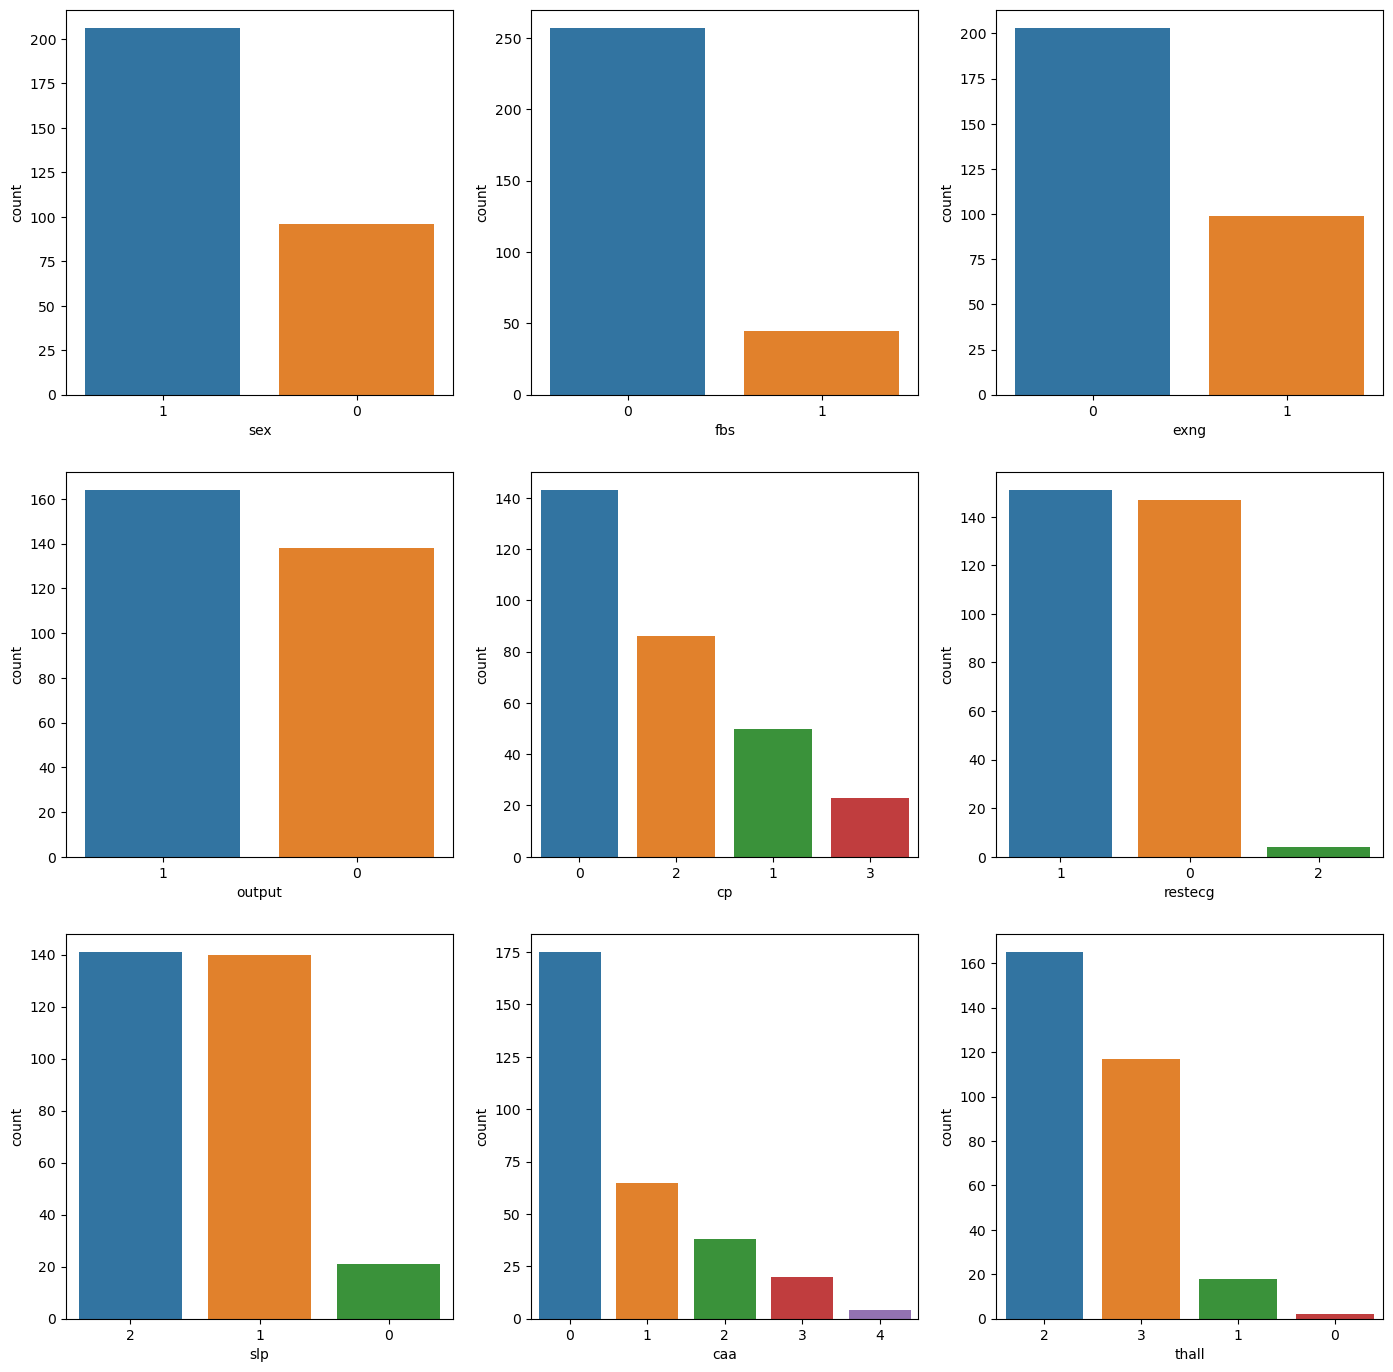

In [12]:
# Pour les variables cathégoriques
_,axss = plt.subplots(3,3, figsize=[17,17]) # set canvas
cat_var = ['sex', 'fbs', 'exng', 'output', 'cp', 'restecg', 'slp', 'caa', 'thall']
idx = 0
for var in cat_var:
    sns.countplot(x=var, data=data , order =data[var].value_counts().index, ax = axss[idx // 3][idx % 3])
    idx += 1

C:\Users\TSAFACK\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\TSAFACK\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\TSAFACK\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\TSAFACK\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

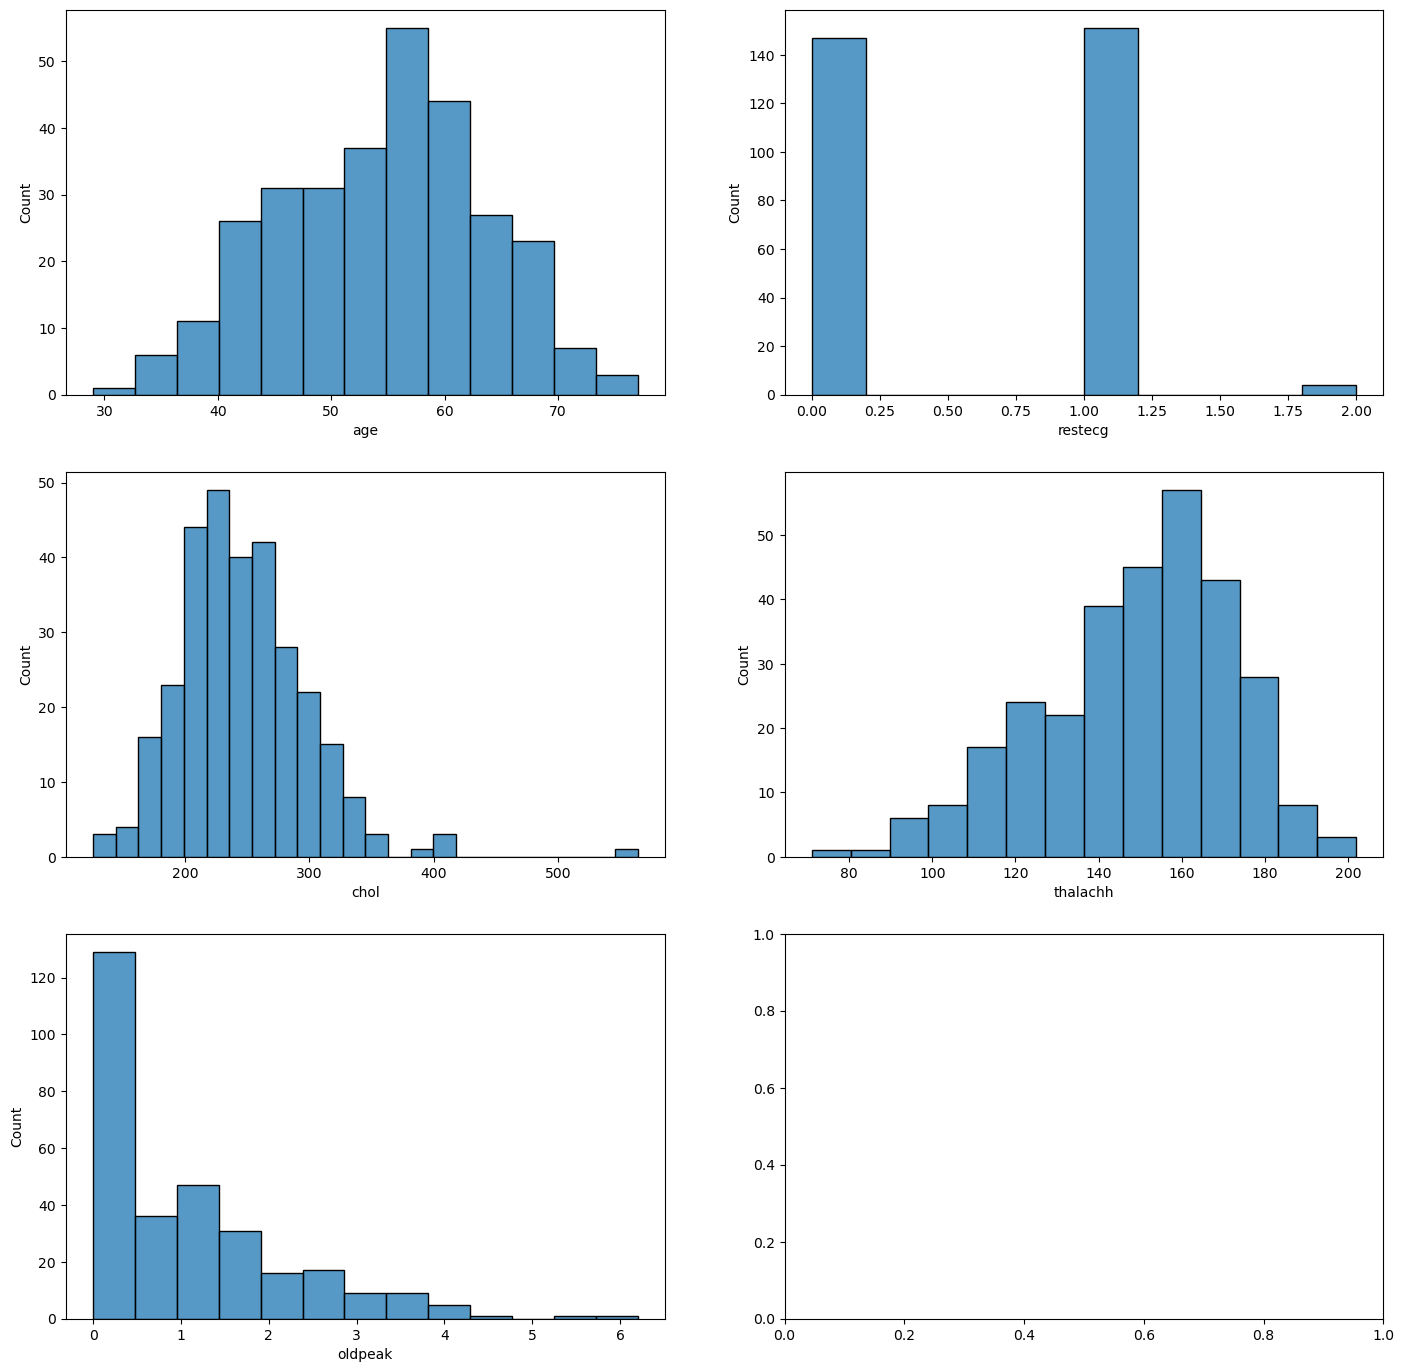

In [13]:
# Pour les variables numériques
_,axss = plt.subplots(3,2, figsize=[17,17])
idx = 0
for var in numeric_var:
    sns.histplot(x=var, data= data, ax = axss[idx // 2][idx % 2])
    idx += 1

In [14]:
#Matrice de correlation

correlation = data.corr()

In [15]:
correlation

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

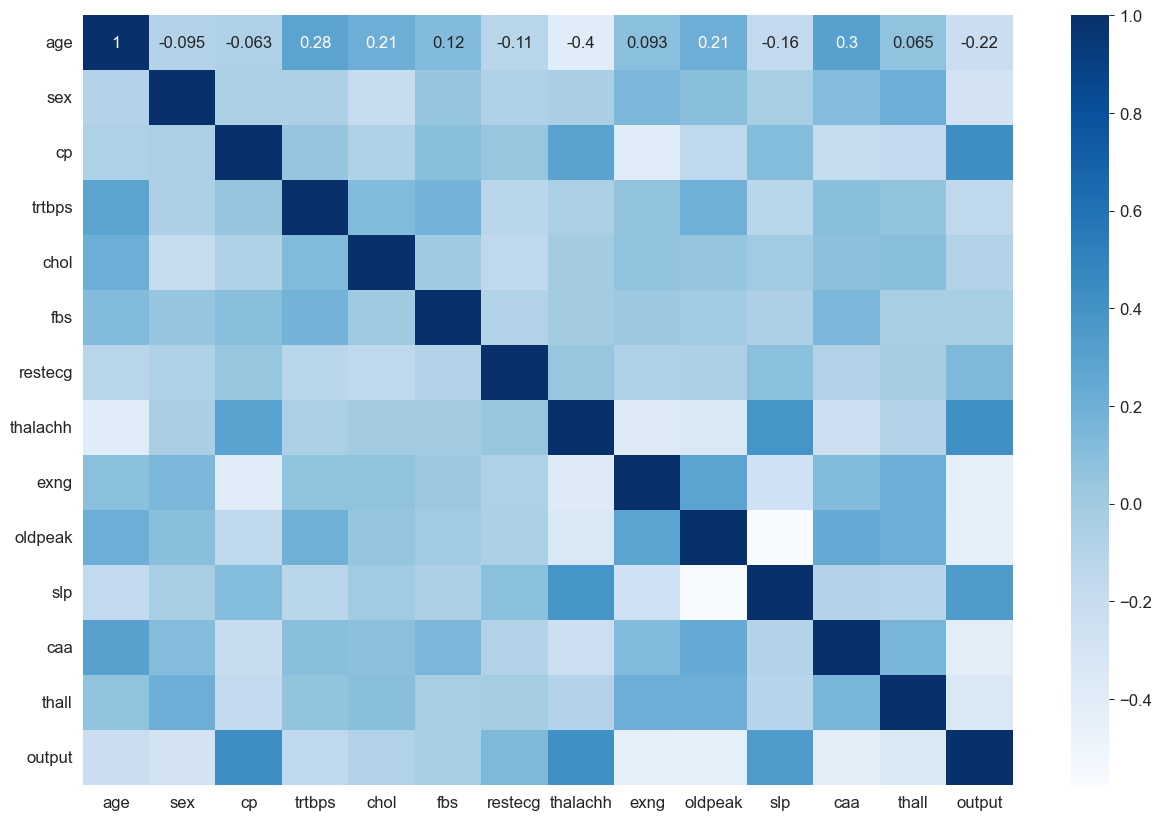

In [16]:
# Tracer la matrice de corrélation sous forme de heatmap

plt.figure(figsize=(15,10))
matplotlib.rcParams['font.size']=12
sns.set_style('whitegrid')
sns.heatmap(correlation, annot=True, cmap='Blues')

### Comparaison entre deux groupes

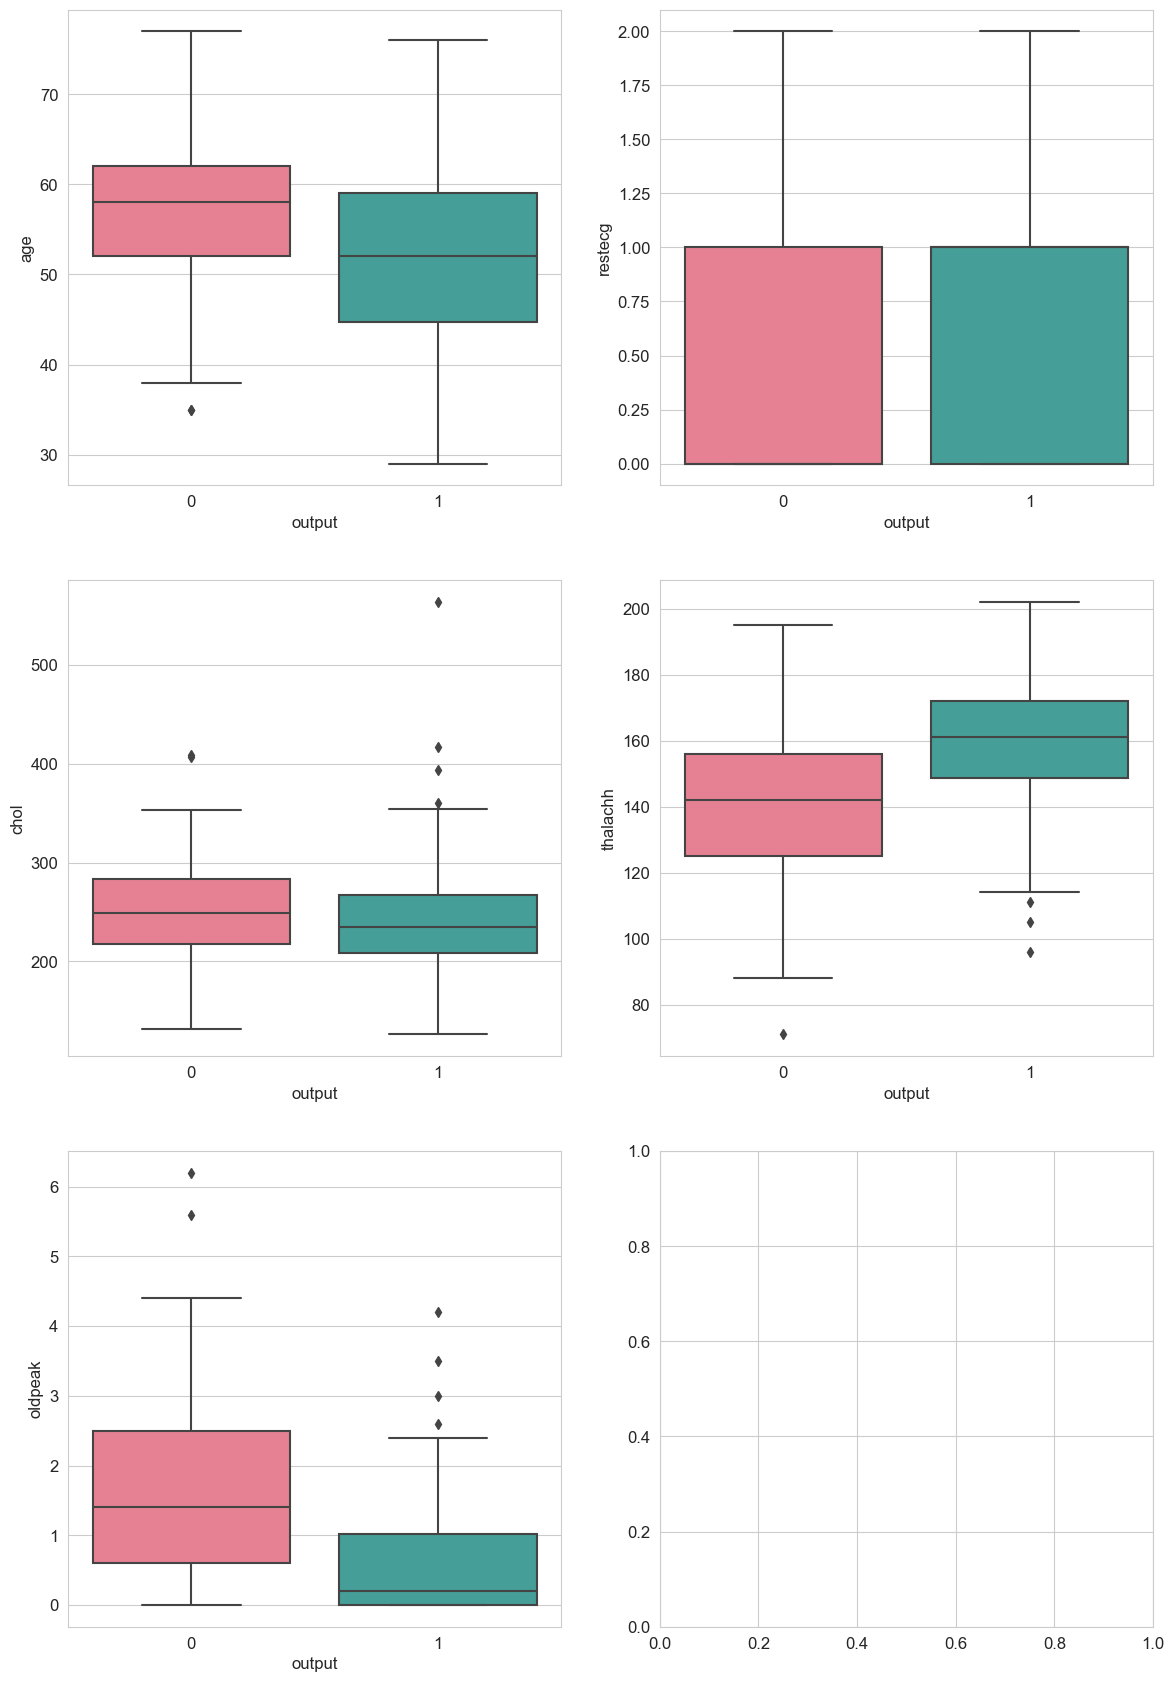

In [17]:
# variable numérique
_,axss = plt.subplots(3,2, figsize=[14,21])
idx = 0
for var in numeric_var:
    sns.boxplot(x = 'output', y = var, data = data, palette = 'husl', ax = axss[idx // 2][idx % 2])
    idx += 1

AttributeError: 'float' object has no attribute 'startswith'

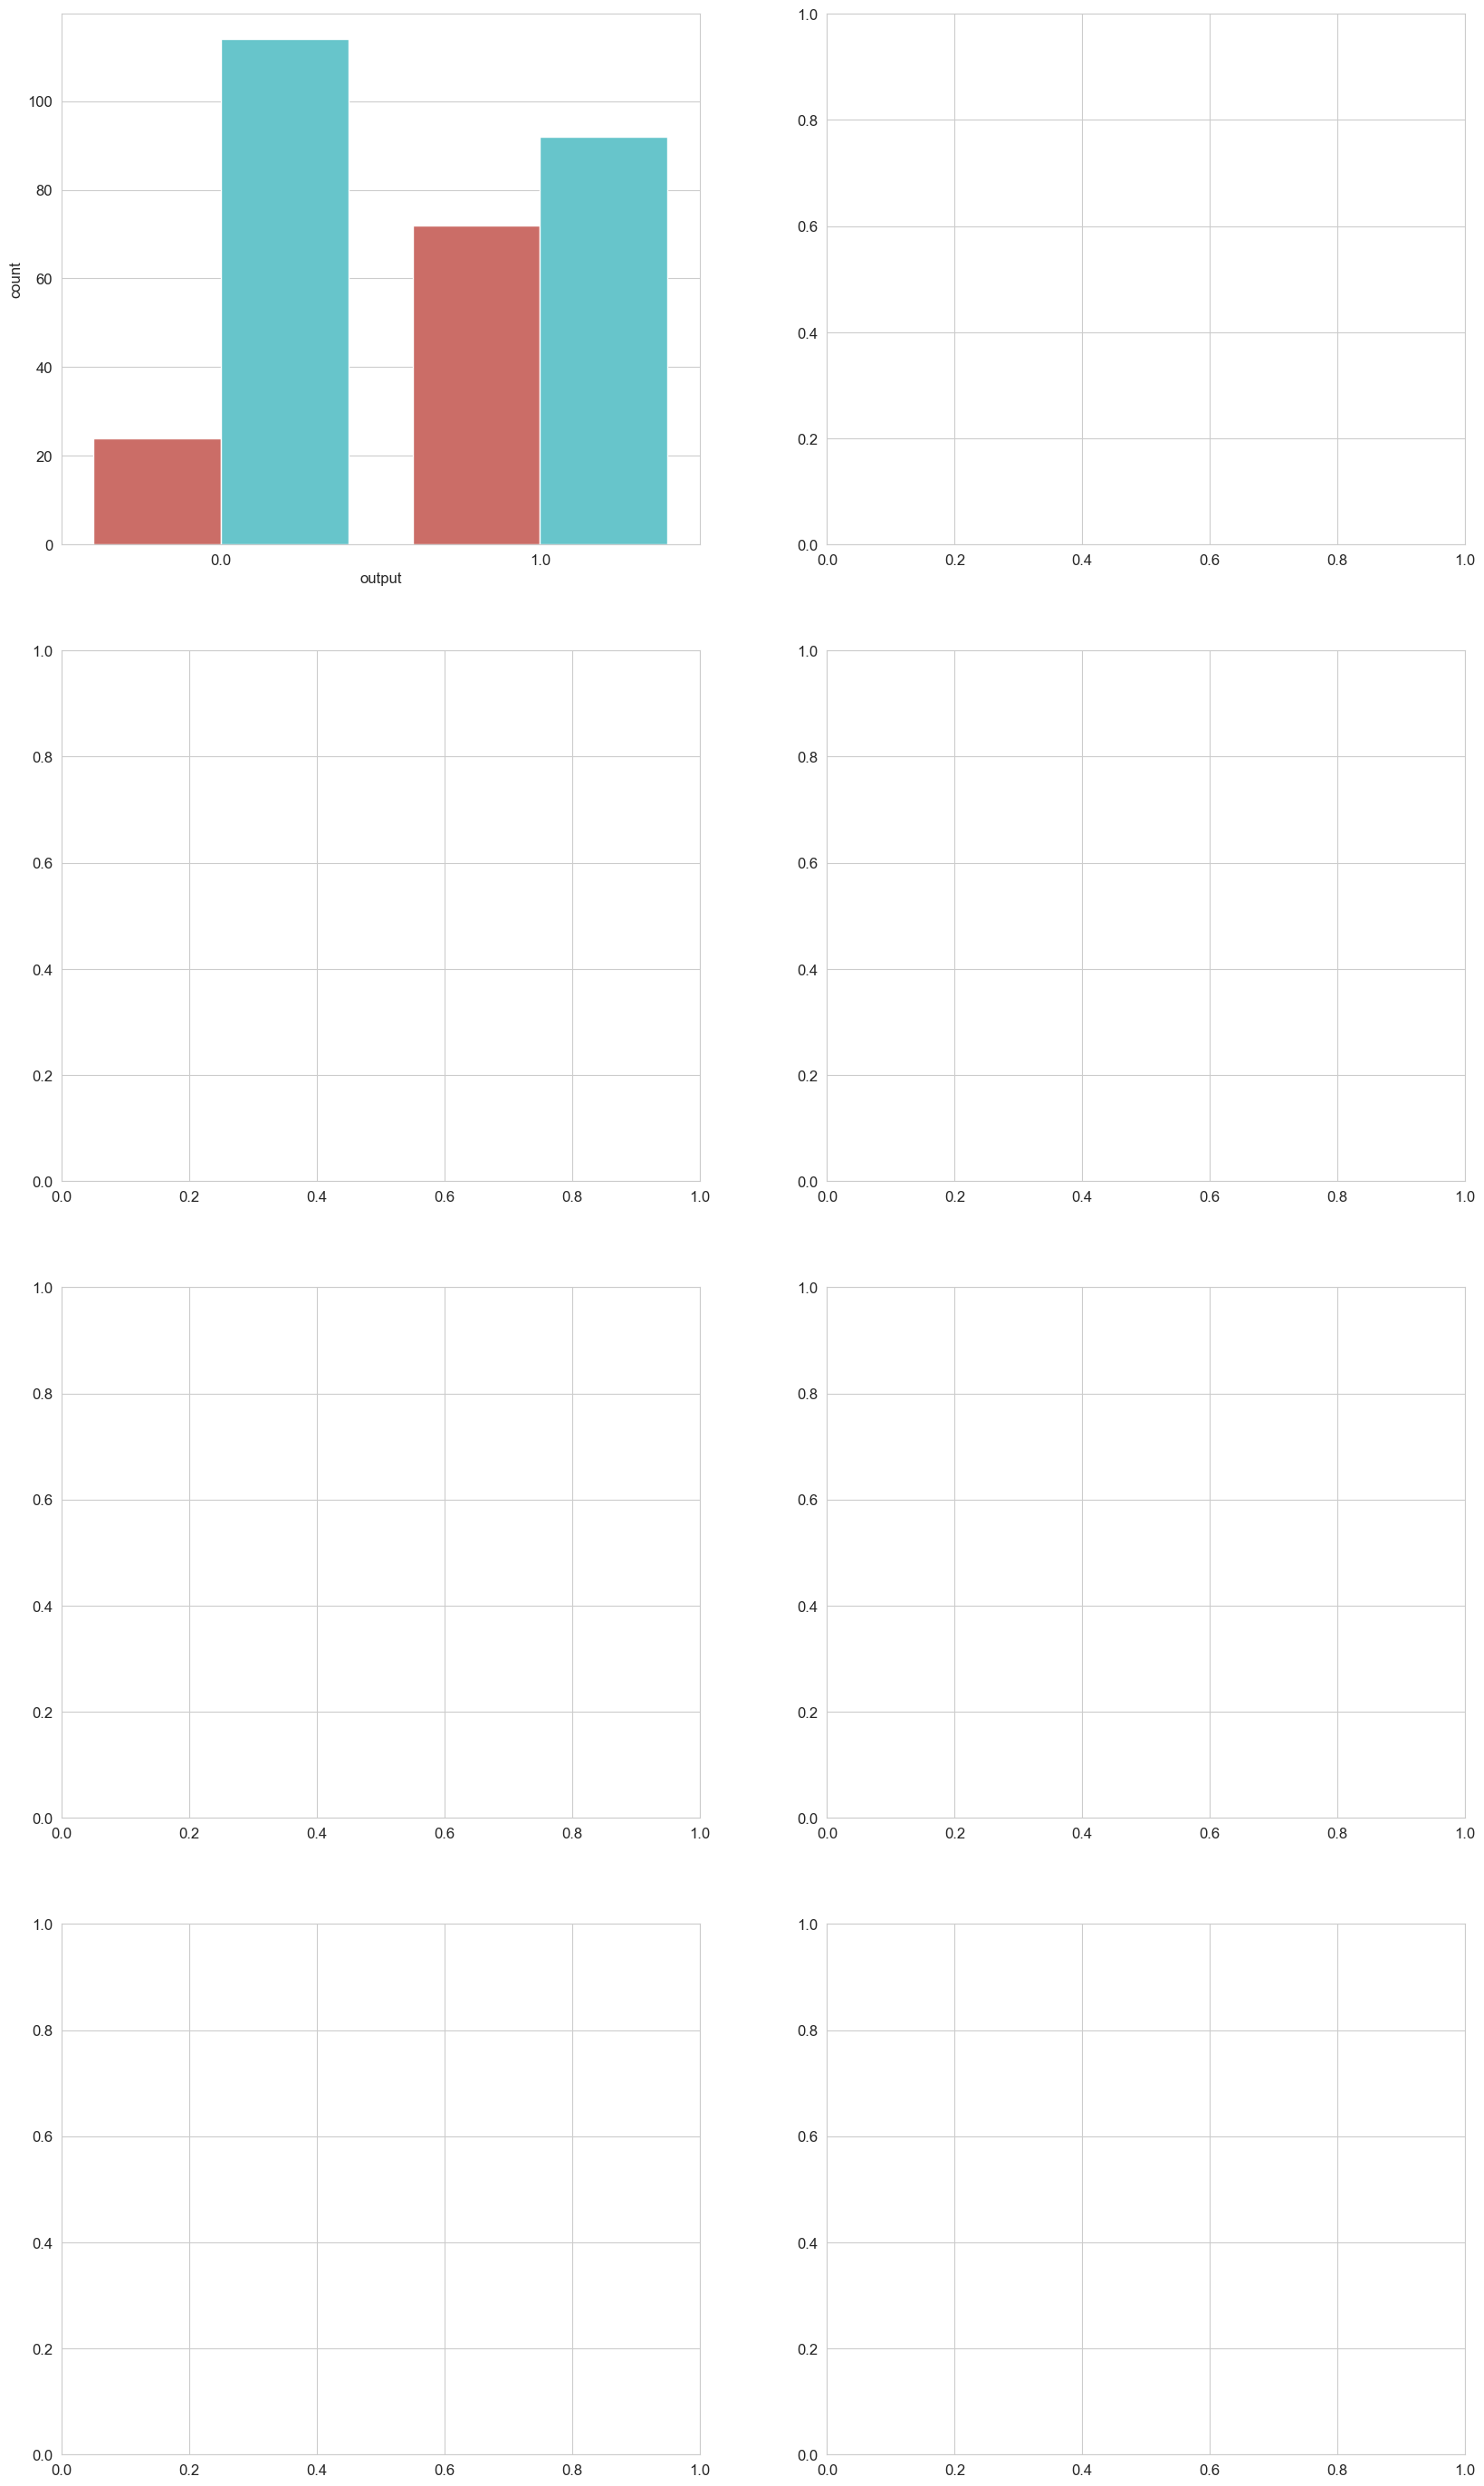

In [109]:
_, axss = plt.subplots(4, 2, figsize=[20, 35]) # Définir la taille de la figure
cat_var = ['sex', 'fbs', 'exng', 'output', 'cp', 'restecg', 'slp', 'caa', 'thall']
idx = 0
for var in cat_var:
    if var == 'output':
        continue
    if isinstance(data[var].iloc[0], float): # Vérifier si le type est float
        data[var] = data[var].astype('category') # Conversion en type catégorie
    sns.countplot(x='output', hue=var, data=data, palette='hls', ax=axss[idx // 2, idx % 2])
    idx += 1

plt.show()

## Feature Processing

In [18]:
# dispose of outlier (non-delete method)
# there's some outliers (illegal value) occurred in ca (ca = 4) and thal (thal = 0)
# df['ca'] == 4 -> 3; df['thal'] == 0 -> 1
data['caa'] = data['caa'].replace(4,3)
data['thall'] = data['thall'].replace(0, 1)
# due to the excessive categorical imbalance in 'restecg' category,
# I decide to merge 1 and 2 after checking the interpretation of the resting electr
# df['restecg'] = 2 -> 1
data['restecg'] = data['restecg'].replace(2,1)
# then 'restecg' would be a binary variable

In [19]:
# change categorical vars into objects
# numeric: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
# binary: 'sex', 'fbs', 'exang', 'target', 'restecg' -> ordinal encoder
# multi-catagorical: 'cp', 'slope', 'ca', 'thal' -> one hot encoding
cat_var = ['sex', 'fbs', 'exng', 'output', 'cp', 'restecg', 'slp', 'caa', 'thall']
for var in cat_var:
    data[var] = data[var].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    object 
 11  caa       302 non-null    object 
 12  thall     302 non-null    object 
 13  output    302 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 35.4+ KB


In [20]:
# for binary variables, ordinary encoder is enough
from sklearn.preprocessing import OrdinalEncoder
bin_var = ['sex', 'fbs', 'exng', 'output', 'restecg']
enc_oe = OrdinalEncoder()
for bins in bin_var:
    enc_oe.fit(data[[bins]])
    data[[bins]] = enc_oe.transform(data[[bins]])
    
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1.0,3,145,233,1.0,0.0,150,0.0,2.3,0,0,1,1.0
1,37,1.0,2,130,250,0.0,1.0,187,0.0,3.5,0,0,2,1.0
2,41,0.0,1,130,204,0.0,0.0,172,0.0,1.4,2,0,2,1.0
3,56,1.0,1,120,236,0.0,1.0,178,0.0,0.8,2,0,2,1.0
4,57,0.0,0,120,354,0.0,1.0,163,1.0,0.6,2,0,2,1.0


In [93]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1.0,3,145,233,1.0,0.0,150,0.0,2.3,0,0,1,1.0
1,37,1.0,2,130,250,0.0,1.0,187,0.0,3.5,0,0,2,1.0
2,41,0.0,1,130,204,0.0,0.0,172,0.0,1.4,2,0,2,1.0
3,56,1.0,1,120,236,0.0,1.0,178,0.0,0.8,2,0,2,1.0
4,57,0.0,0,120,354,0.0,1.0,163,1.0,0.6,2,0,2,1.0


In [21]:
# for nulti-categorical variables, they need one-hot encoding (transform them into
from sklearn.preprocessing import OneHotEncoder
multi_cat = ['cp', 'slp', 'caa', 'thall']
def OneHotEncoding(df, enc, categories):
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(columns=categories)
                                                                            
enc_ohe = OneHotEncoder()
enc_ohe.fit(data[multi_cat])
data = OneHotEncoding(data, enc_ohe, multi_cat)                                                                    
        

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    float64
 2   trtbps    302 non-null    int64  
 3   chol      302 non-null    int64  
 4   fbs       302 non-null    float64
 5   restecg   302 non-null    float64
 6   thalachh  302 non-null    int64  
 7   exng      302 non-null    float64
 8   oldpeak   302 non-null    float64
 9   output    302 non-null    float64
 10  cp_0      302 non-null    float64
 11  cp_1      302 non-null    float64
 12  cp_2      302 non-null    float64
 13  cp_3      302 non-null    float64
 14  slp_0     302 non-null    float64
 15  slp_1     302 non-null    float64
 16  slp_2     302 non-null    float64
 17  caa_0     302 non-null    float64
 18  caa_1     302 non-null    float64
 19  caa_2     302 non-null    float64
 20  caa_3     302 non-null    float6

In [23]:
# standarize continuous data
from sklearn.preprocessing import StandardScaler
numeric_var
scaler = StandardScaler()
scaler.fit(data[numeric_var])

data[numeric_var] = scaler.transform(data[numeric_var])
data.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,output,...,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,thall_1,thall_2,thall_3
0,0.949794,1.0,145,-0.261285,1.0,-1.026850,0.018826,0.0,1.084022,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.928548,1.0,130,0.067741,0.0,0.973852,1.636979,0.0,2.118926,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.485726,0.0,130,-0.822564,0.0,-1.026850,0.980971,0.0,0.307844,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.174856,1.0,120,-0.203222,0.0,0.973852,1.243374,0.0,-0.209608,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.285561,0.0,120,2.080602,0.0,0.973852,0.587366,1.0,-0.382092,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Séparation des datasets d'entrainements et de test

In [24]:
from sklearn import model_selection

y = data['output']
x = data.drop('output', axis=1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, stratify=y)

print('Le jeu de données d\'entraînement contient ' + str(x_train.shape[0]) + ' observations avec ' + str(x_train.shape[1]) + ' variables.')
print('Le jeu de données de test contient ' + str(x_test.shape[0]) + ' observations avec ' + str(x_test.shape[1]) + ' variables.')

Le jeu de données d'entraînement contient 241 observations avec 23 variables.
Le jeu de données de test contient 61 observations avec 23 variables.


## Modèle d'entrainement et d'évaluation

In [25]:
# There are three models we are going to use during this project
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# This is for confusion matrix
from sklearn import metrics, model_selection

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# Support Vector Classification
classifier_SVC = SVC(probability=True)

# GB classifier
classifier_GB = GradientBoostingClassifier()

# Gaussian Naive Bayes
classifier_NB = GaussianNB()

#### Classification Régression logistique 

In [1]:
classifier_logistic.fit(x_train, y_train) # Entraîner le modèle
y_predict = classifier_logistic.predict(x_train) # Prédire les résultats

# Calculer la précision sur le jeu d'entraînement (méthode point estimation)
res_1 = classifier_logistic.score(x_train, y_train)
print(f"L'exactitude du classifieur logistique est de {round(res_1 * 100, 3)}%")

# Validation croisée
scores = model_selection.cross_val_score(classifier_logistic, x_train, y_train, cv=5)
print(f"Pour le classifieur logistique, l'exactitude est de {round(scores.mean() * 100, 2)}% " \
      f"({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}% ~ " \
      f"{round(scores.mean() * 100 + scores.std() * 100 * 1.96, 2)}%)")

# Matrice de confusion
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

# Rapport de classification
print(metrics.classification_report(y_train, y_predict))

NameError: name 'classifier_logistic' is not defined

<h4>Classification KNN</h4>

Pour KNN, l'exactitude est de 75.92% (62.76% ~ 89.07%)


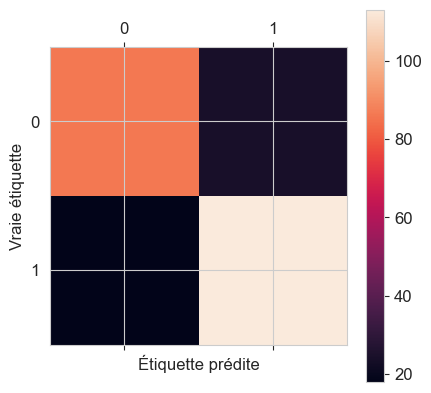

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       110
         1.0       0.82      0.86      0.84       131

    accuracy                           0.83       241
   macro avg       0.83      0.82      0.82       241
weighted avg       0.83      0.83      0.83       241



In [27]:
# KNN Classifier
classifier_KNN.fit(x_train, y_train) # Entraîner le modèle
y_predict = classifier_KNN.predict(x_train) # Prédire les résultats

# Validation croisée
scores = model_selection.cross_val_score(classifier_KNN, x_train, y_train, cv=10)
print(f"Pour KNN, l'exactitude est de {round(scores.mean() * 100, 2)}% " \
      f"({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}% " \
      f"~ {round(scores.mean() * 100 + scores.std() * 100 * 1.96, 2)}%)")

# Matrice de confusion
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

# Rapport de classification
print(metrics.classification_report(y_train, y_predict))

<h4>Ramdom Forest

Pour Random Forest, l'exactitude est de 85.9% (79.45% ~ 92.35%)


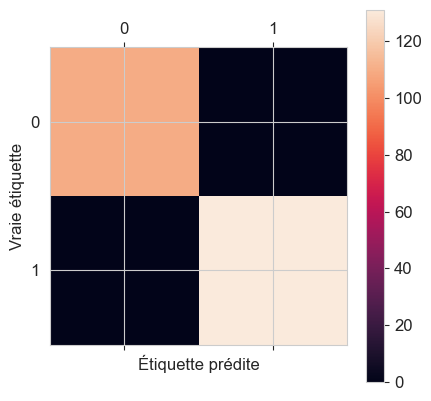

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00       131

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



In [28]:
# Random Forest Classifier
classifier_RF.fit(x_train, y_train) # Entraîner le modèle
y_predict = classifier_RF.predict(x_train) # Prédire les résultats

# Validation croisée
scores = model_selection.cross_val_score(classifier_RF, x_train, y_train, cv=10)
print(f"Pour Random Forest, l'exactitude est de {round(scores.mean() * 100, 2)}% " \
      f"({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}% " \
      f"~ {round(scores.mean() * 100 + scores.std() * 100 * 1.96, 2)}%)")

# Matrice de confusion
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

# Rapport de classification
print(metrics.classification_report(y_train, y_predict))

<h4>SVC

Pour SVC, l'exactitude est de 54.35% (53.27% ~ 55.43%)


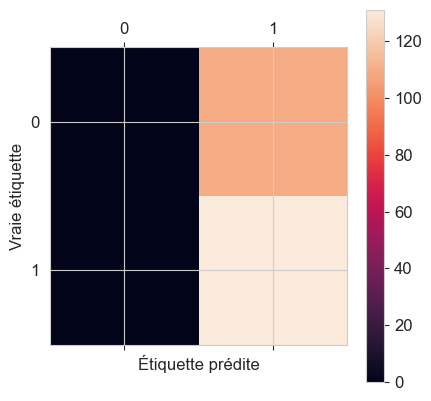

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       110
         1.0       0.54      1.00      0.70       131

    accuracy                           0.54       241
   macro avg       0.27      0.50      0.35       241
weighted avg       0.30      0.54      0.38       241



C:\Users\TSAFACK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TSAFACK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TSAFACK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# SVC Classifier
classifier_SVC.fit(x_train, y_train) # Entraîner le modèle
y_predict = classifier_SVC.predict(x_train) # Prédire les résultats

# Validation croisée
scores = model_selection.cross_val_score(classifier_SVC, x_train, y_train, cv=10)
print(f"Pour SVC, l'exactitude est de {round(scores.mean() * 100, 2)}% " \
      f"({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}% " \
      f"~ {round(scores.mean() * 100 + scores.std() * 100 * 1.96, 2)}%)")

# Matrice de confusion
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

# Rapport de classification
print(metrics.classification_report(y_train, y_predict))

<h4>GB Classifier

Pour GB Classifier, l'exactitude est de 81.73% (66.12% ~ 97.35%)


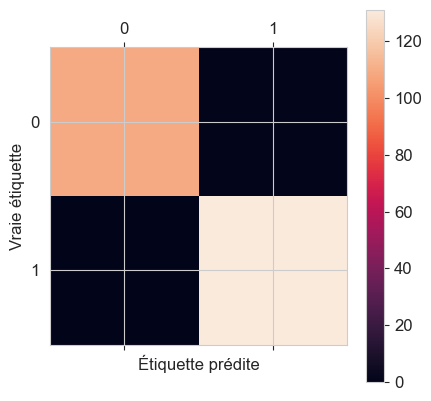

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       110
         1.0       0.99      1.00      1.00       131

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



In [30]:
# GB Classifier
classifier_GB.fit(x_train, y_train) # Entraîner le modèle
y_predict = classifier_GB.predict(x_train) # Prédire les résultats

# Validation croisée
scores = model_selection.cross_val_score(classifier_GB, x_train, y_train, cv=10)
print(f"Pour GB Classifier, l'exactitude est de {round(scores.mean() * 100, 2)}% " \
      f"({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}% " \
      f"~ {round(scores.mean() * 100 + scores.std() * 100 * 1.96, 2)}%)")

# Matrice de confusion
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

print(metrics.classification_report(y_train, y_predict))

<h4>Naive Baiye

Pour le classifieur Naive Bayes, l'exactitude est de 83.0% (74.6% ~ 91.4%)


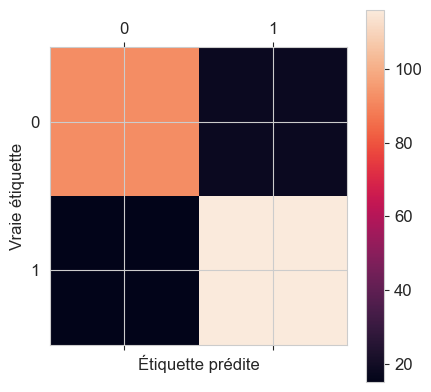

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       110
         1.0       0.87      0.89      0.88       131

    accuracy                           0.86       241
   macro avg       0.86      0.86      0.86       241
weighted avg       0.86      0.86      0.86       241



In [31]:
# Naive Bayes Classifier
classifier_NB.fit(x_train, y_train, sample_weight=None) # Entraîner le modèle
y_predict = classifier_NB.predict(x_train) # Prédire les résultats

# Validation croisée
scores = model_selection.cross_val_score(classifier_NB, x_train, y_train, cv=10)
print(f"Pour le classifieur Naive Bayes, l'exactitude est de {round(scores.mean() * 100, 2)}% " \
      f"({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}% " \
      f"~ {round(scores.mean() * 100 + scores.std() * 100 * 1.96, 2)}%)")

# Matrice de confusion
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

# Rapport de classification
print(metrics.classification_report(y_train, y_predict))

<H2>Optimisation des Hyperparamètres